In [2]:
import pandas as pd 
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [9]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,10)})

In [10]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [11]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


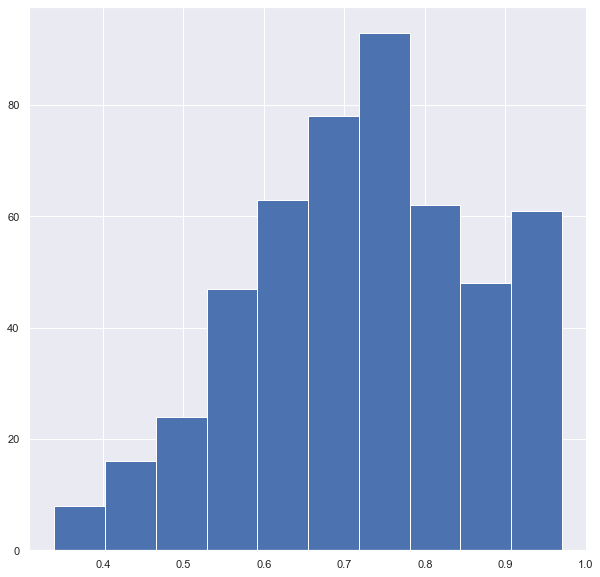

In [26]:
plt.hist(df['Chance of Admit '])
plt.show()

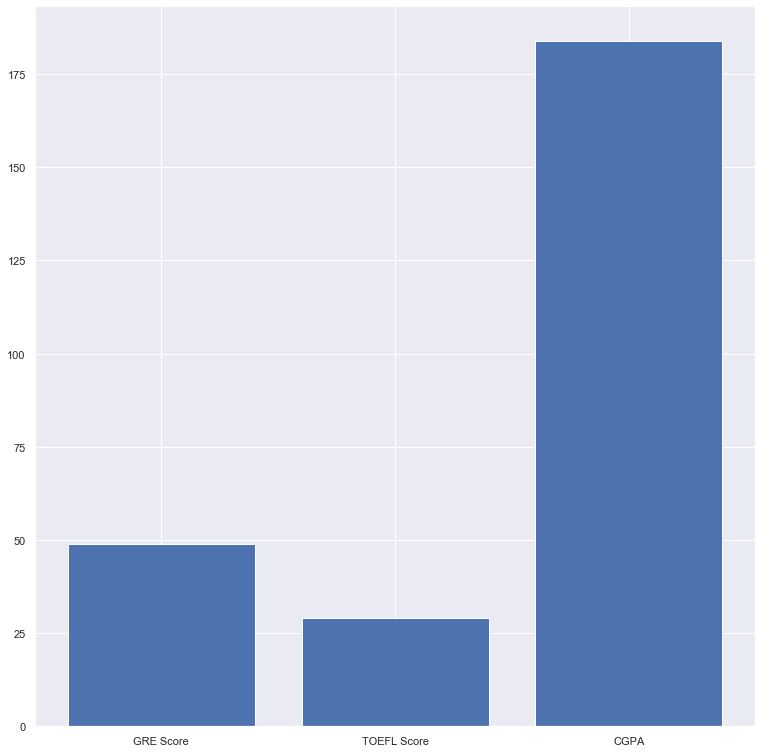

In [36]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['GRE Score', 'TOEFL Score', 'CGPA']
students = [df['GRE Score'].nunique(),df['TOEFL Score'].nunique(), df['CGPA'].nunique()]
ax.bar(langs,students)
plt.show()

In [45]:
df.drop(['Serial No.'], axis=1,inplace=True)

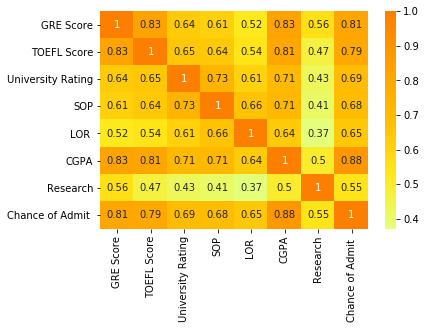

In [46]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [47]:
y = df['Chance of Admit ']
df.drop(['Chance of Admit '], axis=1,inplace=True)
x = df
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.05, random_state=0)


#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Y_pred=regressor.predict(xtest)
acc=metrics.r2_score(ytest,Y_pred)
mse=metrics.mean_squared_error(ytest,Y_pred)
print("Total mean squared error is: {}".format(mse))
print("The accuracy of the model is: {}%".format(round(acc*100)))

Total mean squared error is: 0.0023187442341330356
The accuracy of the model is: 87.0%


438    0.67
21     0.70
367    0.57
96     0.48
233    0.64
       ... 
323    0.62
192    0.86
117    0.45
47     0.89
172    0.86
Name: Chance of Admit , Length: 475, dtype: float64

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
438,318,110,1,2.5,3.5,8.54,1
21,325,114,4,3.0,2.0,8.40,0
367,311,98,1,1.0,2.5,7.46,0
96,306,100,2,3.0,3.0,8.00,0
233,304,100,2,2.5,3.5,8.07,0
...,...,...,...,...,...,...,...
323,305,102,2,2.0,2.5,8.18,0
192,322,114,5,4.5,4.0,8.94,1
117,290,104,4,2.0,2.5,7.46,0
47,339,119,5,4.5,4.0,9.70,0


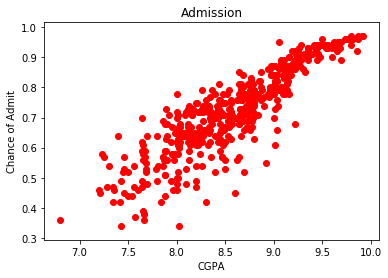

In [92]:
import matplotlib.pyplot as pt
pt.scatter(xtrain['CGPA'], ytrain, color = 'red')
#plt.plot(xtrain['CGPA'], regressor.predict(xtrain), color = 'blue')
#pt.plot(xtrain, regressor.predict(xtrain), color = 'green')
pt.title('Admission')
pt.xlabel('CGPA')
pt.ylabel('Chance of Admit')
pt.show()

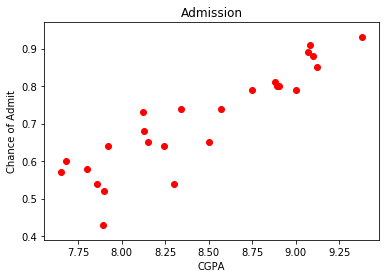

In [83]:
pt.scatter(xtest['CGPA'], ytest, color = 'red')
#pt.plot(xtrain, regressor.predict(xtrain), color = 'green')
pt.title('Admission')
pt.xlabel('CGPA')
pt.ylabel('Chance of Admit')
pt.show()

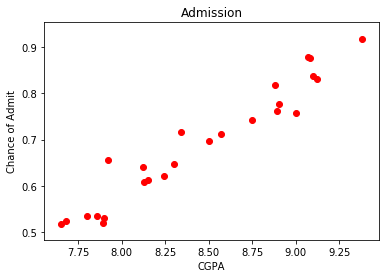

In [84]:
pt.scatter(xtest['CGPA'],Y_pred, color = 'red')
#pt.plot(xtrain, regressor.predict(xtrain), color = 'green')
pt.title('Admission')
pt.xlabel('CGPA')
pt.ylabel('Chance of Admit')
pt.show()

In [100]:
students = [{'GRE Score': 337,
              'TOEFL Score': 118,
              'University Rating': 4,
               'SOP': 4.5,
                'LOR': 4.5,
                'CGPA': 9.65,
                'Research': 1}
            ]

df1 = pd.DataFrame(students)
df1
newAdmit = regressor.predict(df1)

In [98]:
newAdmit

array([0.95074703])

In [108]:
df.iloc[1:6,0:3]

,GRE Score,TOEFL Score,University Rating
1,324,107,4
2,316,104,3
3,322,110,3
4,314,103,2
5,330,115,5


In [125]:
type(df.loc[:,'GRE Score'])

pandas.core.series.Series

In [121]:
df.loc[df['Research'] == 0].head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
4,314,103,2,2.0,3.0,8.21,0
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0
15,314,105,3,3.5,2.5,8.30,0
16,317,107,3,4.0,3.0,8.70,0
18,318,110,3,4.0,3.0,8.80,0
19,303,102,3,3.5,3.0,8.50,0
21,325,114,4,3.0,2.0,8.40,0
26,322,109,5,4.5,3.5,8.80,0


In [124]:
df.iloc[0]

GRE Score            337.00
TOEFL Score          118.00
University Rating      4.00
SOP                    4.50
LOR                    4.50
CGPA                   9.65
Research               1.00
Name: 0, dtype: float64